In [1]:
def read_data(path):
    cities = []
    with open(path, "r") as f:
        csv.reader(f, delimiter=" ")
        for line in f:
            data = line.split(" ")
            data = [float(x.replace("\n", "")) for x in data]
            cities.append([data[0],data[1]])
    return cities

In [2]:
def init():
    line.set_data([], [])
    return line,

def animate(i, every_sol,ax,tours,m):
    
    t = (i*tours)//(tours*m-1) + 1
    
    ant = i%m + 1
    
    title = "Tour: " + str(t) + "     Ant: " + str(ant) 
    ax.set_title(title, va='top')
    sol = every_sol[i]
    x = []
    y = []
    
    for edge in sol:
        x.append(cities[edge.ori][0])
        y.append(cities[edge.ori][1])
    
    x.append(cities[0][0])
    y.append(cities[0][1])
    
    line.set_data(x, y)
    return line,

In [3]:
def save_animation(tours, m, every_sol, minx, miny, maxx, maxy):
    Writer = writers['ffmpeg']
    writer = Writer(fps=10, metadata=dict(artist='Me'), bitrate=100)

    global line

    fig = plt.figure(figsize=(10,6))
    ax = plt.axes(xlim=(minx-1, maxx+1), ylim=(miny-1, maxy+1))
    
    
    line, = ax.plot([],[], color='green', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12, label='ey')


    anim = FuncAnimation(fig, func=animate, blit=True, init_func=init, frames=len(every_sol), repeat=False, fargs=(every_sol,ax,tours,m),interval=100)
    
    name = str(tours) + "tours-" + str(m) +"ants"
    anim.save(name + '.mp4', writer=writer)

# <center> ACO for TSP </center>

In [4]:
import os
import csv
import numpy as np
import math
from datetime import datetime
import matplotlib.pyplot as plt 
import matplotlib
from matplotlib.animation import FuncAnimation
from matplotlib.animation import writers

In [5]:
class Edge:
    def __init__ (self, o, d):
        self.ori = o
        self.dest = d

In [6]:
def isFeasible(edge, solution_construction): #an edge is feasible if the ant has not chosen the destination node yet
    for e in solution_construction:
        if e.ori == edge.dest or e.dest == edge.dest:
            return False
    return True

In [7]:
def construct_termination(solution_construction, n):
    return len(solution_construction) == n - 1

In [8]:
def distance(city1, city2):
    x1 = city1[0]
    x2 = city1[1]
    y1 = city2[0]
    y2 = city2[1]
    return pow(pow(x2-x1, 2)+pow(y2-y1,2),1/2)

In [9]:
def calculate_probability(cities, edge, pheromone_trail, solution_construction):
    alpha = 1 # >= 0
    beta = 1 # >= 1
    eta = 1 / distance(cities[edge.ori], cities[edge.dest])
    numerator = pow(pheromone_trail[edge.ori][edge.dest], alpha) * pow(eta, beta)
    
    denominator = 0
    for l, city in enumerate(cities):
        if edge.ori != l:
            if isFeasible(Edge(edge.ori, l), solution_construction):
                denominator += pow(pheromone_trail[edge.ori][l], alpha) * pow(1/distance(cities[edge.ori], city),beta)
    
    return numerator / denominator

In [10]:
def constructAntSolution(cities, pheromone_trail):
    i = 0
    n = len(cities)
    solution_construction = []
    while not construct_termination(solution_construction, n):
        p = []
        a = []
        for j, city in enumerate(cities):
            if i != j:
                edge = Edge(i, j)
                if isFeasible(edge, solution_construction):
                    p.append(calculate_probability(cities, edge, pheromone_trail, solution_construction))
                else:
                    p.append(0)
                a.append(j)
        
        j = np.random.choice(a, 1, p=p)[0]
        
        solution_construction.append(Edge(i, j))
        i = j
    solution_construction.append(Edge(i, 0))
    return solution_construction

In [11]:
def updatePheromone(pheromone_trail, solutions, cities):
    evaporation_rate = 0.5
    Q = 500
    
    # Evaporation
    for i in range(len(pheromone_trail)):
        for j in range(len(pheromone_trail)):
            pheromone_trail[i][j] *= (1 - evaporation_rate)
    
    for ant_solution in solutions:
        for edge in ant_solution:
            pheromone_trail[edge.ori][edge.dest] += Q / distance(cities[edge.ori], cities[edge.dest])

In [12]:
def aco(cities, m, n, tours):  
    pheromone_trail = []

    every_sol = []

    # Initialize trail
    for i in range(n):
        pheromone_trail.append([0.000000001]*n)

    for t in range(tours):
        solutions = []
       
        # For each ant, construct a solution
        for ant in range(m):
            
            sol = constructAntSolution(cities, pheromone_trail)

            solutions.append(sol)
            every_sol.append(sol)
            
            #plot_solution(sol, str(ant+1), str(t+1),cities)
            #s = solution_string(sol)
            #print("Solution:", s)

        # Update pheromone trail
        updatePheromone(pheromone_trail, solutions, cities)
    
    x, y = [], []
    for c in cities:
        x.append(c[0])
        y.append(c[1])
    minx = min(x)
    maxx = max(x)
    miny = min(y)
    maxy = max(y)
    
    
    save_animation(tours, m, every_sol, minx, miny, maxx, maxy)
    
    return every_sol

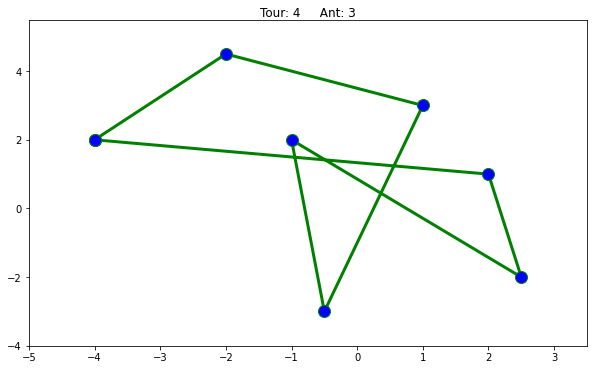

In [13]:
path = os.path.join(os.getcwd(), 'dataset', 'tsp', "instance7.txt")
cities = read_data(path)

m = 3 # number of ants
n = len(cities) # number of cities
tours = 3 # number of tours
iterations = 1
ants = []

times = []

costs = []
paths = []



for it in range(iterations):
    
    ants.append(m)
    
    #start=datetime.now()
    
    every_sol = aco(cities, m, n, tours)
    
    #time = datetime.now()-start

    m+=5

